## MEME STOCKS - Are they actually risky or are they worth investing?

#### What is a meme stock?
##### “A meme stock refers to the shares of a company that have gained a cult-like following online and through social media platforms. These online communities can go on to build hype around a stock through narratives and conversations elaborated in discussion threads on websites like Reddit and posts to followers on platforms like Twitter and Facebook.” Investopedia
GME, AMC, TSLA, BBBY, HOOD, BB, PLTR, NOK, SPCE (List of stocks)

#### Comparison securities
SPY, AGG, top 4 (MSFT, AMZN, GOOG, AAPL)


In [1]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from alpaca_trade_api import TimeFrame
import datetime
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [2]:
load_dotenv()

# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('Alpaca_API_Key')
alpaca_secret_key = os.getenv('Alpaca_Secret_Key')

if type(alpaca_api_key) ==type(''):
    if type(alpaca_secret_key) ==type(''):
        print('You have both Alpaca Keys saved in your environment variables')
    else:
        print('You have the Alpaca Key but no Secret Key saved in your environment variables')
else:
    print('You do not have any Alpaca API Keys saved in your environment variables')

You have both Alpaca Keys saved in your environment variables


In [3]:
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='V2')

In [14]:
# This is where the user inputs are collected and stored as variables

# Set the tickers for both the bond and stock portion of the portfolio
meme_tickers = ['GME','AMC','TSLA','BBBY','HOOD','BB','PLTR','NOK','SPCE']

market_tickers = ['SPY','AGG']

large_cap_tickers = ['AAPL','MSFT','GOOG','AMZN']

# Set the number of years history you'd like the API to pull for the analysis
number_of_years_history = 5

# Set the number of years to look forward in the Monte Carlo forecast
number_of_years_forecast = 5

In [6]:
# Set timeframe to 1D 
timeframe = TimeFrame.Day


number_of_trading_days = 253 * number_of_years_history
number_of_tickers = len(meme_tickers)
limit = number_of_trading_days*number_of_tickers

limit_rows = limit

# Format current date as ISO format
start_date = pd.Timestamp(datetime.date.today() - relativedelta(years=number_of_years_history), tz='America/New_York').isoformat()
end_date = pd.Timestamp(datetime.date.today(), tz='America/New_York').isoformat()

print(f"The approximate number of rows the 'alpaca_prices_df' will produce is: {limit}")

The approximate number of rows the 'alpaca_prices_df' will produce is: 11385


In [7]:
def alpaca_multi_index_df(tickers, tf, start, end, rows):
    stock_prices_multi_index_df = pd.DataFrame()
    count = 0
    for ticker in tickers:
        alpaca_prices = alpaca.get_bars(ticker, tf ,start=start, end=end, limit=rows).df
        column_names = [(ticker, x) for x in alpaca_prices.columns]
        alpaca_prices.columns = pd.MultiIndex.from_tuples(column_names)
        count = count + 1
        if count == 1:
            stock_prices_multi_index_df = alpaca_prices
        else:
            stock_prices_multi_index_df = pd.merge(stock_prices_multi_index_df, alpaca_prices, how = 'outer', left_index=True, right_index=True)
    return stock_prices_multi_index_df


In [8]:
meme_portfolio_multi_index_df = alpaca_multi_index_df(meme_tickers, timeframe, start_date, end_date, limit_rows)
meme_portfolio_multi_index_df

GME                                      \
                              open      high     low   close    volume   
timestamp                                                                
2017-04-05 04:00:00+00:00   22.190   22.2900   21.74   21.76   2168922   
2017-04-06 04:00:00+00:00   21.960   22.1700   21.74   21.84   3296184   
2017-04-07 04:00:00+00:00   21.820   22.0209   21.58   21.66   3754542   
2017-04-10 04:00:00+00:00   21.600   22.1200   21.56   21.88   2345274   
2017-04-11 04:00:00+00:00   21.800   22.1500   21.68   22.11   2718362   
...                            ...       ...     ...     ...       ...   
2022-03-30 04:00:00+00:00  175.025  183.3369  165.00  166.85   9092904   
2022-03-31 04:00:00+00:00  163.100  175.7450  158.51  166.58  11239609   
2022-04-01 04:00:00+00:00  188.690  189.7688  155.26  165.00  13184045   
2022-04-04 04:00:00+00:00  167.000  173.2400  156.51  170.73   4637617   
2022-04-05 04:00:00+00:00  168.000  168.4300  152.00  153.59   3952656   

                                                     AMC                  ...  \
                          trade_count        vwap   open    high     low  ...   
timestamp                                                                 ...   
2017-04-05 04:00:00+00:00       15099   22.014457  31.75  31.800  30.875  ...   
2017-04-06 04:00:00+00:00       16689   21.908465  30.95  31.000  30.350  ...   
2017-04-07 04:00:00+00:00       23473   21.774464  30.70  30.900  30.250  ...   
2017-04-10 04:00:00+00:00       14176   21.901005  30.55  30.700  30.100  ...   
2017-04-11 04:00:00+00:00       16442   22.008212  30.60  30.850  30.350  ...   
...                               ...         ...    ...     ...     ...  ...   
2022-03-30 04:00:00+00:00      175443  174.402192  28.59  29.226  25.350  ...   
2022-03-31 04:00:00+00:00      199225  172.584853  24.77  25.920  23.260  ...   
2022-04-01 04:00:00+00:00      277942  173.455744  25.22  25.280  22.340  ...   
2022-04-04 04:00:00+00:00      102346  166.023376  23.48  23.750  21.940  ...   
2022-04-05 04:00:00+00:00      103818  158.106704  23.18  23.960  21.000  ...   

                                NOK                         SPCE          \
                             volume trade_count      vwap   open    high   
timestamp                                                                  
2017-04-05 04:00:00+00:00  14431265       15669  5.237768    NaN     NaN   
2017-04-06 04:00:00+00:00  10654633       12416  5.248350    NaN     NaN   
2017-04-07 04:00:00+00:00   5663239        7256  5.279580    NaN     NaN   
2017-04-10 04:00:00+00:00   6250937       10213  5.320742    NaN     NaN   
2017-04-11 04:00:00+00:00   8194725       10623  5.258640    NaN     NaN   
...                             ...         ...       ...    ...     ...   
2022-03-30 04:00:00+00:00  25983117       28158  5.559583  10.81  11.140   
2022-03-31 04:00:00+00:00  18098290       21710  5.498655  10.56  10.650   
2022-04-01 04:00:00+00:00  17525572       25566  5.509307   9.98  10.400   
2022-04-04 04:00:00+00:00  14694709       23301  5.572727  10.14  10.685   
2022-04-05 04:00:00+00:00  26475691       25302  5.534666  10.61  10.690   

                                                                             
                              low  close      volume trade_count       vwap  
timestamp                                                                    
2017-04-05 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
2017-04-06 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
2017-04-07 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
2017-04-10 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
2017-04-11 04:00:00+00:00     NaN    NaN         NaN         NaN        NaN  
...                           ...    ...         ...         ...        ...  
2022-03-30 04:00:00+00:00  10.460  10.69  13819614.0     82554.0  10.831899  
2022-03-31 04:

In [9]:
meme_portfolio_prices_df = alpaca.get_bars(meme_tickers, timeframe ,start=start_date, end=end_date, limit=limit_rows).df
meme_portfolio_prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-05 04:00:00+00:00,31.75,31.8000,30.875,31.00,1227257,7401,31.206448,AMC
2017-04-06 04:00:00+00:00,30.95,31.0000,30.350,30.80,932052,6488,30.741811,AMC
2017-04-07 04:00:00+00:00,30.70,30.9000,30.250,30.35,1099043,6742,30.417316,AMC
2017-04-10 04:00:00+00:00,30.55,30.7000,30.100,30.65,782463,5405,30.393309,AMC
2017-04-11 04:00:00+00:00,30.60,30.8500,30.350,30.70,712543,5323,30.639968,AMC
...,...,...,...,...,...,...,...,...
2022-03-30 04:00:00+00:00,1091.07,1113.9500,1084.000,1093.99,19955007,597501,1098.548645,TSLA
2022-03-31 04:00:00+00:00,1094.01,1103.1399,1076.641,1077.60,16270066,506977,1089.404685,TSLA
2022-04-01 04:00:00+00:00,1080.71,1094.7500,1066.640,1084.59,18057555,548116,1081.406344,TSLA


In [15]:
market_portfolio_multi_index_df = alpaca_multi_index_df(market_tickers, timeframe, start_date, end_date, limit_rows)
market_portfolio_multi_index_df

SPY                                       \
                             open     high      low   close     volume   
timestamp                                                                
2017-04-05 04:00:00+00:00  236.26  237.390  234.540  234.78  108800604   
2017-04-06 04:00:00+00:00  234.96  236.040  234.425  235.44   69135757   
2017-04-07 04:00:00+00:00  235.18  236.000  234.640  235.20   74412311   
2017-04-10 04:00:00+00:00  235.36  236.255  234.730  235.34   67615302   
2017-04-11 04:00:00+00:00  234.90  235.180  233.340  235.06   88045276   
...                           ...      ...      ...     ...        ...   
2022-03-30 04:00:00+00:00  460.29  461.195  456.465  458.79   79668682   
2022-03-31 04:00:00+00:00  457.92  458.760  451.160  452.11  118607132   
2022-04-01 04:00:00+00:00  453.30  453.460  449.140  452.92   88676014   
2022-04-04 04:00:00+00:00  453.20  456.910  452.260  456.80   59663209   
2022-04-05 04:00:00+00:00  455.23  457.830  449.820  451.03   74022189   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2017-04-05 04:00:00+00:00      363080  235.933657  108.48  108.740  108.4530   
2017-04-06 04:00:00+00:00      244996  235.287745  108.64  108.710  108.4800   
2017-04-07 04:00:00+00:00      235941  235.290964  108.80  108.890  108.4200   
2017-04-10 04:00:00+00:00      211985  235.487358  108.53  108.650  108.4901   
2017-04-11 04:00:00+00:00      306525  234.499802  108.79  108.980  108.7500   
...                               ...         ...     ...      ...       ...   
2022-03-30 04:00:00+00:00      659199  459.158702  106.60  107.150  106.5900   
2022-03-31 04:00:00+00:00      751169  455.444107  107.19  107.380  107.0600   
2022-04-01 04:00:00+00:00      624745  451.850848  106.35  106.950  106.2500   
2022-04-04 04:00:00+00:00      503316  455.309774  106.87  106.870  106.5600   
2022-04-05 04:00:00+00:00      644313  453.412462  106.60  106.625  105.7400   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-04-05 04:00:00+00:00  108.69   2304074       11167  108.599103  
2017-04-06 04:00:00+00:00  108.68   1725301        7746  108.588276  
2017-04-07 04:00:00+00:00  108.44   1783599        8534  108.645684  
2017-04-10 04:00:00+00:00  108.58   1903768       12236  108.566615  
2017-04-11 04:00:00+00:00  108.89   2200830       11420  108.874603  
...                           ...       ...         ...         ...  
2022-03-30 04:00:00+00:00  107.15  11544378       24975  107.007713  
2022-03-31 04:00:00+00:00  107.10  13788220       44817  107.229272  
2022-04-01 04:00:00+00:00  106.75  11579091       40126  106.667931  
2022-04-04 04:00:00+00:00  106.84   9956493       32544  106.739298  
2022-04-05 04:00:00+00:00  105.76  11018430       34684  105.931526  

[1260 rows x 14 columns]

In [16]:
market_portfolio_prices_df = alpaca.get_bars(market_tickers, timeframe ,start=start_date, end=end_date, limit=limit_rows).df
market_portfolio_prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-05 04:00:00+00:00,108.48,108.740,108.4530,108.69,2304074,11167,108.599103,AGG
2017-04-06 04:00:00+00:00,108.64,108.710,108.4800,108.68,1725301,7746,108.588276,AGG
2017-04-07 04:00:00+00:00,108.80,108.890,108.4200,108.44,1783599,8534,108.645684,AGG
2017-04-10 04:00:00+00:00,108.53,108.650,108.4901,108.58,1903768,12236,108.566615,AGG
2017-04-11 04:00:00+00:00,108.79,108.980,108.7500,108.89,2200830,11420,108.874603,AGG
...,...,...,...,...,...,...,...,...
2022-03-30 04:00:00+00:00,460.29,461.195,456.4650,458.79,79668682,659199,459.158702,SPY
2022-03-31 04:00:00+00:00,457.92,458.760,451.1600,452.11,118607132,751169,455.444107,SPY
2022-04-01 04:00:00+00:00,453.30,453.460,449.1400,452.92,88676014,624745,451.850848,SPY


In [17]:
large_cap_portfolio_multi_index_df = alpaca_multi_index_df(large_cap_tickers, timeframe, start_date, end_date, limit_rows)
large_cap_portfolio_multi_index_df

AAPL                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2017-04-05 04:00:00+00:00  144.64  145.4600  143.810  144.02   27724102   
2017-04-06 04:00:00+00:00  144.26  144.5200  143.450  143.66   21150383   
2017-04-07 04:00:00+00:00  143.73  144.1800  143.270  143.34   16676498   
2017-04-10 04:00:00+00:00  143.50  143.8792  142.900  143.17   18934702   
2017-04-11 04:00:00+00:00  142.90  143.3500  140.060  141.63   30881588   
...                           ...       ...      ...     ...        ...   
2022-03-30 04:00:00+00:00  178.51  179.6100  176.700  177.77   91633724   
2022-03-31 04:00:00+00:00  177.80  178.0300  174.400  174.61  102719625   
2022-04-01 04:00:00+00:00  174.05  174.8800  171.940  174.31   78565894   
2022-04-04 04:00:00+00:00  174.62  178.4900  174.440  178.44   76466048   
2022-04-05 04:00:00+00:00  177.55  178.3000  174.415  175.06   73280511   

                                                     MSFT                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2017-04-05 04:00:00+00:00      169568  144.784955   65.95   66.350   65.4443   
2017-04-06 04:00:00+00:00      124825  143.937203   65.60   66.055   65.4800   
2017-04-07 04:00:00+00:00      110322  143.714195   65.85   65.960   65.4400   
2017-04-10 04:00:00+00:00      112269  143.356350   65.79   65.820   65.3600   
2017-04-11 04:00:00+00:00      194111  141.460993   65.45   65.610   64.8500   
...                               ...         ...     ...      ...       ...   
2022-03-30 04:00:00+00:00      695868  178.119343  313.63  315.950  311.5800   
2022-03-31 04:00:00+00:00      710887  175.876423  314.04  315.140  307.8900   
2022-04-01 04:00:00+00:00      659181  173.413651  309.50  310.130  305.5400   
2022-04-04 04:00:00+00:00      629384  177.485223  310.25  315.110  309.7100   
2022-04-05 04:00:00+00:00      619195  175.978639  313.20  314.865  309.8700   

                           ...     GOOG                              AMZN  \
                           ...   volume trade_count         vwap     open   
timestamp                  ...                                              
2017-04-05 04:00:00+00:00  ...  1555430       23177   835.293199   910.69   
2017-04-06 04:00:00+00:00  ...  1254853       18759   830.487048   913.80   
2017-04-07 04:00:00+00:00  ...  1057262       17571   824.559497   899.65   
2017-04-10 04:00:00+00:00  ...   982180       14777   826.330849   899.63   
2017-04-11 04:00:00+00:00  ...  1079732       19110   821.387738   907.04   
...                        ...      ...         ...          ...      ...   
2022-03-30 04:00:00+00:00  ...  1052319       63872  2854.803811  3370.19   
2022-03-31 04:00:00+00:00  ...  1471847       77471  2812.943930  3326.60   
2022-04-01 04:00:00+00:00  ...  1168379       66961  2804.379684  3282.99   
2022-04-04 04:00:00+00:00  ...   951540       63743  2866.459638  3281.36   
2022-04-05 04:00:00+00:00  ...   961914       64157  2834.469761  3354.83   

                                                                               \
                                high        low    close   volume trade_count   
timestamp                                                                       
2017-04-05 04:00:00+00:00   923.7200   905.6200   909.28  7508516      104374   
2017-04-06 04:00:00+00:00   917.1899   894.4927   898.28  6344076       84652   
2017-04-07 04:00:00+00:00   900.0900   889.3100   894.88  3714372       52488   
2017-04-10 04:00:00+00:00   908.5100   899.0000   907.04  3185728       46059   
2017-04-11 04:00:00+00:00   911.2400   897.5000   902.36  3012770       44779   
...                              ...        ...      ...      ...         ...   
2022-03-30 04:00:00+00:00  3379.0100  3310.0000  

In [18]:
large_cap_portfolio_prices_df = alpaca.get_bars(large_cap_tickers, timeframe ,start=start_date, end=end_date, limit=limit_rows).df
large_cap_portfolio_prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-05 04:00:00+00:00,144.64,145.4600,143.81,144.02,27724102,169568,144.784955,AAPL
2017-04-06 04:00:00+00:00,144.26,144.5200,143.45,143.66,21150383,124825,143.937203,AAPL
2017-04-07 04:00:00+00:00,143.73,144.1800,143.27,143.34,16676498,110322,143.714195,AAPL
2017-04-10 04:00:00+00:00,143.50,143.8792,142.90,143.17,18934702,112269,143.356350,AAPL
2017-04-11 04:00:00+00:00,142.90,143.3500,140.06,141.63,30881588,194111,141.460993,AAPL
...,...,...,...,...,...,...,...,...
2022-03-30 04:00:00+00:00,313.63,315.9500,311.58,313.86,28163565,340161,313.713418,MSFT
2022-03-31 04:00:00+00:00,314.04,315.1400,307.89,308.31,33327683,351810,310.414324,MSFT
2022-04-01 04:00:00+00:00,309.50,310.1300,305.54,309.42,27026101,313495,308.049343,MSFT


In [2]:
#READ THE CSV FILE

## Quantitative Analysis

The analysis has several components: performance, risk, risk-return profile, and portfolio diversification.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market (S&P 500, AGG, TOP 4 STOCKS)

In [3]:
#DAILY RETURNS - DANICA
#dailyreturns_df = df.pct_change().dropna()

In [4]:
#CUMULATIVE RETURNS - DANICA
#cumulative_returns = (1+ dailyreturns_df).cumprod() - 1

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [5]:
#BETA/VARIANCE - SUNG

In [6]:
#STANDARD DEVIATIONS - JUNG

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

In [7]:
#SHARPE RATIO - JENNIFER

In [8]:
#MONTE CARLO - RYAN

In [21]:
# Configure the Monte Carlo simulation for evenly weighted portfolios
# Forecasting 5 years cumulative returns across 500 samples

mc_meme_even = MCSimulation(
    portfolio_data=meme_portfolio_multi_index_df,
#    weights=[.1,.1,.1],
    num_simulation=500,
    num_trading_days=252*number_of_years_forecast)
mc_meme_even.portfolio_data.head()

GME                                              \
                            open     high    low  close   volume trade_count   
timestamp                                                                      
2017-04-05 04:00:00+00:00  22.19  22.2900  21.74  21.76  2168922       15099   
2017-04-06 04:00:00+00:00  21.96  22.1700  21.74  21.84  3296184       16689   
2017-04-07 04:00:00+00:00  21.82  22.0209  21.58  21.66  3754542       23473   
2017-04-10 04:00:00+00:00  21.60  22.1200  21.56  21.88  2345274       14176   
2017-04-11 04:00:00+00:00  21.80  22.1500  21.68  22.11  2718362       16442   

                                                     AMC         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-04-05 04:00:00+00:00  22.014457          NaN  31.75  31.80  ...   
2017-04-06 04:00:00+00:00  21.908465     0.003676  30.95  31.00  ...   
2017-04-07 04:00:00+00:00  21.774464    -0.008242  30.70  30.90  ...   
2017-04-10 04:00:00+00:00  21.901005     0.010157  30.55  30.70  ...   
2017-04-11 04:00:00+00:00  22.008212     0.010512  30.60  30.85  ...   

                                NOK              SPCE                        \
                               vwap daily_return open high low close volume   
timestamp                                                                     
2017-04-05 04:00:00+00:00  5.237768          NaN  NaN  NaN NaN   NaN    NaN   
2017-04-06 04:00:00+00:00  5.248350     0.009653  NaN  NaN NaN   NaN    NaN   
2017-04-07 04:00:00+00:00  5.279580     0.009560  NaN  NaN NaN   NaN    NaN   
2017-04-10 04:00:00+00:00  5.320742     0.005682  NaN  NaN NaN   NaN    NaN   
2017-04-11 04:00:00+00:00  5.258640    -0.007533  NaN  NaN NaN   NaN    NaN   

                                                         
                          trade_count vwap daily_return  
timestamp                                                
2017-04-05 04:00:00+00:00         NaN  NaN          NaN  
2017-04-06 04:00:00+00:00         NaN  NaN          NaN  
2017-04-07 04:00:00+00:00         NaN  NaN          NaN  
2017-04-10 04:00:00+00:00         NaN  NaN          NaN  
2017-04-11 04:00:00+00:00         NaN  NaN          NaN  

[5 rows x 72 columns]

In [22]:
mc_meme_even.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 110.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 120.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 130.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 140.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 150.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 160.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 170.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 180.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 190.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 200.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 210.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 220.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 230.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 240.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 250.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 260.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 270.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 280.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 290.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 300.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 310.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 320.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 330.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 340.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 350.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 360.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 370.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 380.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 390.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 400.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 410.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 420.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 430.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 440.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 450.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 460.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 470.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 480.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 490.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005933,1.024374,0.979248,0.976059,0.989407,1.023718,0.994518,0.994620,1.023778,1.019476,...,0.984993,1.026120,0.975798,1.004646,0.981106,1.066703,1.015878,1.007811,0.994209,0.976705
2,1.047797,1.028313,0.994090,0.997228,0.981398,1.029824,0.988682,0.942356,1.041841,1.019814,...,0.994837,1.008713,0.983419,1.016591,0.978082,1.077699,1.036977,1.045344,1.000177,0.954777
3,1.068146,1.022074,1.006604,0.992401,0.972306,1.034399,0.985972,0.937195,1.013585,1.063494,...,0.977150,1.020653,0.973817,1.022753,0.974331,1.116497,1.044921,0.997042,1.020232,0.966831
4,1.053214,1.032134,0.959661,0.993840,0.964653,1.022577,1.015111,0.954586,0.988740,1.097058,...,0.928220,1.016339,0.946241,1.086122,0.928345,1.117454,1.027297,1.000657,1.037246,0.973413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.741382,2.810322,2.832653,1.910554,2.007364,7.087531,10.166272,8.500813,7.795169,11.771809,...,3.487442,0.942574,2.393803,3.440974,1.834045,1.856645,10.866610,2.397570,5.775019,2.029417
1257,1.650307,2.826622,2.874356,1.940876,1.983599,6.845186,10.242432,8.833231,7.579371,11.686132,...,3.621524,0.917946,2.299932,3.442302,1.811197,1.926905,10.685809,2.353018,5.854495,2.070932
1258,1.625877,2.843950,2.720371,1.892473,1.957504,6.700037,9.926370,9.018952,7.636937,12.026797,...,3.587508,0.903918,2.395619,3.520990,1.827713,1.886424,10.887249,2.367167,5.909945,2.094077
1259,1.714901,2.894808,2.635468,1.856207,1.947994,6.269817,10.004344,8.997751,7.600621,12.261567,...,3.632336,0.882619,2.432086,3.601583,1.886614,1.900828,11.236506,2.404254,5.942445,2.145645


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

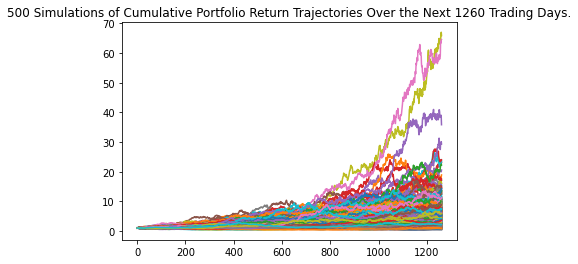

In [23]:
mc_meme_even.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

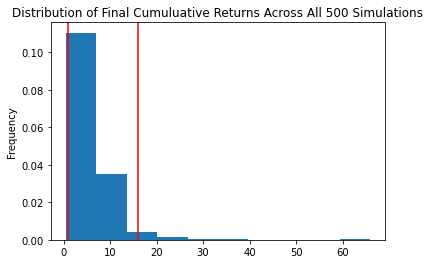

In [24]:
mc_meme_even.plot_distribution()

In [26]:
mc_meme_even_summary = mc_meme_even.summarize_cumulative_return()
mc_meme_even_summary

C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              5.724801
std               5.688248
min               0.447056
25%               2.508415
50%               4.508380
75%               7.392995
max              65.939702
95% CI Lower      1.008035
95% CI Upper     16.020445
Name: 1260, dtype: float64

In [30]:
mc_meme_even_lower_95 = mc_meme_even_summary[8]
mc_meme_even_upper_95 = mc_meme_even_summary[9]
mc_meme_even_mean = mc_meme_even_summary[1]
display(round(mc_meme_even_lower_95,2),
        round(mc_meme_even_mean,2),
        round(mc_meme_even_upper_95,2))

1.01

5.72

16.02

In [32]:
# Configure the Monte Carlo simulation for evenly weighted portfolios
# Forecasting 5 years cumulative returns across 500 samples

mc_market_even = MCSimulation(
    portfolio_data=market_portfolio_multi_index_df,
#    weights=[.5,.5],
    num_simulation=500,
    num_trading_days=252*number_of_years_forecast)
mc_meme_even.portfolio_data.head()

GME                                              \
                            open     high    low  close   volume trade_count   
timestamp                                                                      
2017-04-05 04:00:00+00:00  22.19  22.2900  21.74  21.76  2168922       15099   
2017-04-06 04:00:00+00:00  21.96  22.1700  21.74  21.84  3296184       16689   
2017-04-07 04:00:00+00:00  21.82  22.0209  21.58  21.66  3754542       23473   
2017-04-10 04:00:00+00:00  21.60  22.1200  21.56  21.88  2345274       14176   
2017-04-11 04:00:00+00:00  21.80  22.1500  21.68  22.11  2718362       16442   

                                                     AMC         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-04-05 04:00:00+00:00  22.014457          NaN  31.75  31.80  ...   
2017-04-06 04:00:00+00:00  21.908465     0.003676  30.95  31.00  ...   
2017-04-07 04:00:00+00:00  21.774464    -0.008242  30.70  30.90  ...   
2017-04-10 04:00:00+00:00  21.901005     0.010157  30.55  30.70  ...   
2017-04-11 04:00:00+00:00  22.008212     0.010512  30.60  30.85  ...   

                                NOK              SPCE                        \
                               vwap daily_return open high low close volume   
timestamp                                                                     
2017-04-05 04:00:00+00:00  5.237768          NaN  NaN  NaN NaN   NaN    NaN   
2017-04-06 04:00:00+00:00  5.248350     0.009653  NaN  NaN NaN   NaN    NaN   
2017-04-07 04:00:00+00:00  5.279580     0.009560  NaN  NaN NaN   NaN    NaN   
2017-04-10 04:00:00+00:00  5.320742     0.005682  NaN  NaN NaN   NaN    NaN   
2017-04-11 04:00:00+00:00  5.258640    -0.007533  NaN  NaN NaN   NaN    NaN   

                                                         
                          trade_count vwap daily_return  
timestamp                                                
2017-04-05 04:00:00+00:00         NaN  NaN          NaN  
2017-04-06 04:00:00+00:00         NaN  NaN          NaN  
2017-04-07 04:00:00+00:00         NaN  NaN          NaN  
2017-04-10 04:00:00+00:00         NaN  NaN          NaN  
2017-04-11 04:00:00+00:00         NaN  NaN          NaN  

[5 rows x 72 columns]

In [34]:
mc_market_even.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 110.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 120.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 130.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 140.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 150.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 160.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 170.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 180.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 190.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 200.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 210.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 220.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 230.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 240.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 250.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 260.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 270.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 280.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 290.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 300.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 310.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 320.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 330.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 340.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 350.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 360.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 370.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 380.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 390.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 400.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 410.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 420.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 430.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 440.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 450.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 460.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 470.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 480.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 490.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003028,0.993510,0.998902,0.999974,1.002970,1.001901,0.997007,1.005830,1.000658,0.992547,...,1.003896,0.996645,0.996014,0.995494,1.009655,0.990246,0.977579,1.000132,1.000845,0.996830
2,0.992241,1.001830,0.998297,1.007372,1.001318,0.995927,1.003564,1.008914,0.999347,0.988543,...,1.009766,1.003410,0.991306,0.988621,1.006271,0.995078,0.971900,1.006270,1.001745,0.998942
3,0.989066,1.005453,1.008277,1.008615,1.001415,0.995705,1.001696,1.013985,0.996750,0.996771,...,1.007960,0.995672,0.985612,0.994370,1.007071,1.006047,0.978544,1.014574,1.002649,0.983699
4,0.991021,1.008717,1.009077,1.006349,0.998500,0.989842,1.005034,1.007541,1.000258,1.002985,...,0.997839,1.006824,0.984803,0.997770,1.013302,1.016176,0.974462,1.025993,1.015387,0.977188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.376333,1.379895,1.169295,1.221316,1.768807,1.224461,1.367943,1.211065,1.860070,1.315896,...,0.810471,1.182568,1.337487,1.496354,1.218609,1.027831,1.674980,2.042710,1.402869,1.598511
1257,1.373821,1.377537,1.172865,1.233573,1.765302,1.223423,1.356255,1.216241,1.850757,1.318244,...,0.815632,1.176037,1.331066,1.493066,1.217195,1.009542,1.670171,2.064300,1.398093,1.609234
1258,1.378562,1.379436,1.166307,1.226143,1.767913,1.227125,1.367207,1.212590,1.868310,1.318574,...,0.820672,1.184511,1.342345,1.504321,1.218782,1.016087,1.657646,2.062124,1.372842,1.614955
1259,1.379401,1.379930,1.160665,1.232540,1.758077,1.221935,1.363732,1.207067,1.868132,1.314029,...,0.807475,1.195086,1.341559,1.510721,1.219717,1.022412,1.675389,2.065209,1.384615,1.608091


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

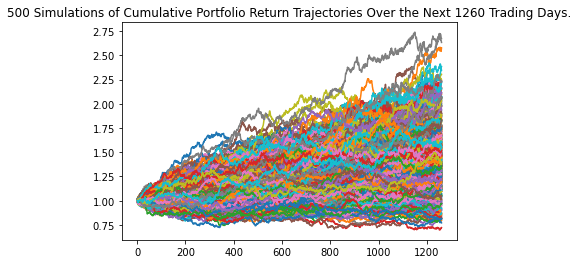

In [35]:
mc_market_even.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

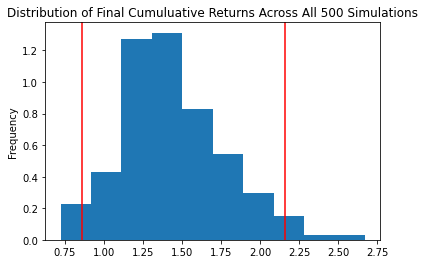

In [36]:
mc_market_even.plot_distribution()

In [37]:
mc_market_even_summary = mc_market_even.summarize_cumulative_return()
mc_market_even_summary

C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.441416
std               0.334109
min               0.722038
25%               1.219823
50%               1.389700
75%               1.635741
max               2.672239
95% CI Lower      0.856943
95% CI Upper      2.162539
Name: 1260, dtype: float64

In [38]:
mc_market_even_lower_95 = mc_market_even_summary[8]
mc_market_even_upper_95 = mc_market_even_summary[9]
mc_market_even_mean = mc_market_even_summary[1]
display(round(mc_market_even_lower_95,2),
        round(mc_market_even_mean,2),
        round(mc_market_even_upper_95,2))

0.86

1.44

2.16

In [40]:
# Configure the Monte Carlo simulation for evenly weighted portfolios
# Forecasting 5 years cumulative returns across 500 samples

mc_large_cap_even = MCSimulation(
    portfolio_data=large_cap_portfolio_multi_index_df,
#    weights=[.25,.25,.25,.25],
    num_simulation=500,
    num_trading_days=252*number_of_years_forecast)
mc_meme_even.portfolio_data.head()

GME                                              \
                            open     high    low  close   volume trade_count   
timestamp                                                                      
2017-04-05 04:00:00+00:00  22.19  22.2900  21.74  21.76  2168922       15099   
2017-04-06 04:00:00+00:00  21.96  22.1700  21.74  21.84  3296184       16689   
2017-04-07 04:00:00+00:00  21.82  22.0209  21.58  21.66  3754542       23473   
2017-04-10 04:00:00+00:00  21.60  22.1200  21.56  21.88  2345274       14176   
2017-04-11 04:00:00+00:00  21.80  22.1500  21.68  22.11  2718362       16442   

                                                     AMC         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-04-05 04:00:00+00:00  22.014457          NaN  31.75  31.80  ...   
2017-04-06 04:00:00+00:00  21.908465     0.003676  30.95  31.00  ...   
2017-04-07 04:00:00+00:00  21.774464    -0.008242  30.70  30.90  ...   
2017-04-10 04:00:00+00:00  21.901005     0.010157  30.55  30.70  ...   
2017-04-11 04:00:00+00:00  22.008212     0.010512  30.60  30.85  ...   

                                NOK              SPCE                        \
                               vwap daily_return open high low close volume   
timestamp                                                                     
2017-04-05 04:00:00+00:00  5.237768          NaN  NaN  NaN NaN   NaN    NaN   
2017-04-06 04:00:00+00:00  5.248350     0.009653  NaN  NaN NaN   NaN    NaN   
2017-04-07 04:00:00+00:00  5.279580     0.009560  NaN  NaN NaN   NaN    NaN   
2017-04-10 04:00:00+00:00  5.320742     0.005682  NaN  NaN NaN   NaN    NaN   
2017-04-11 04:00:00+00:00  5.258640    -0.007533  NaN  NaN NaN   NaN    NaN   

                                                         
                          trade_count vwap daily_return  
timestamp                                                
2017-04-05 04:00:00+00:00         NaN  NaN          NaN  
2017-04-06 04:00:00+00:00         NaN  NaN          NaN  
2017-04-07 04:00:00+00:00         NaN  NaN          NaN  
2017-04-10 04:00:00+00:00         NaN  NaN          NaN  
2017-04-11 04:00:00+00:00         NaN  NaN          NaN  

[5 rows x 72 columns]

In [41]:
mc_large_cap_even.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 110.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 120.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 130.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 140.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 150.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 160.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 170.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 180.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 190.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 200.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 210.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 220.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 230.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 240.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 250.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 260.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 270.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 280.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 290.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 300.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 310.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 320.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 330.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 340.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 350.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 360.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 370.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 380.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 390.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 400.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 410.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 420.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 430.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 440.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 450.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 460.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 470.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 480.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

Running Monte Carlo simulation number 490.


C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013782,1.024959,1.002360,0.981167,1.019126,0.992268,1.017741,1.004059,1.008932,0.980604,...,1.008883,1.029293,0.992251,1.001774,1.008385,1.025336,0.993489,0.990027,0.995959,0.986065
2,0.999451,1.022643,0.991731,0.977916,1.009055,0.993567,0.992504,0.993821,1.016702,0.997762,...,0.996974,1.028080,1.001567,0.997692,1.019158,1.021738,1.010283,0.995002,0.999760,0.988694
3,0.978417,1.027788,0.987590,0.972426,0.993151,1.003873,0.991727,0.979314,0.997408,1.006280,...,0.992100,1.037729,0.999440,0.990574,1.014261,1.021160,1.007197,1.010773,0.996313,0.980840
4,0.951855,1.025530,0.991993,0.984640,0.986035,1.009595,0.992834,0.971731,0.992726,0.996199,...,0.981601,1.036154,1.014154,0.992639,1.008976,1.020227,1.022037,1.006291,1.006342,0.979039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.548163,3.610511,5.053079,2.260908,4.918380,3.701182,3.780895,1.847528,1.941517,4.620386,...,2.537149,4.944668,4.272834,2.663804,2.730028,6.642534,4.415533,2.217230,3.538541,5.906865
1257,4.548968,3.627988,4.983351,2.280101,4.908392,3.758691,3.819002,1.859259,1.933800,4.686508,...,2.572413,5.001217,4.307379,2.697102,2.745458,6.640608,4.370875,2.216571,3.548708,6.034608
1258,4.532497,3.623357,5.002403,2.253236,4.962093,3.728482,3.890391,1.842405,1.930802,4.585995,...,2.558114,4.943181,4.259943,2.732199,2.750790,6.635252,4.424084,2.222254,3.475274,6.001601
1259,4.633325,3.592232,5.020833,2.208617,4.882911,3.719227,3.911694,1.843891,1.960255,4.577365,...,2.571773,4.898723,4.323117,2.766342,2.749361,6.625839,4.442657,2.274045,3.422373,5.994775


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

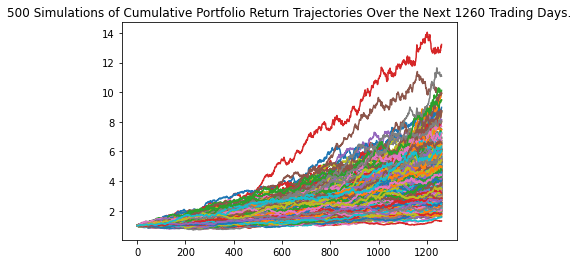

In [42]:
mc_large_cap_even.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

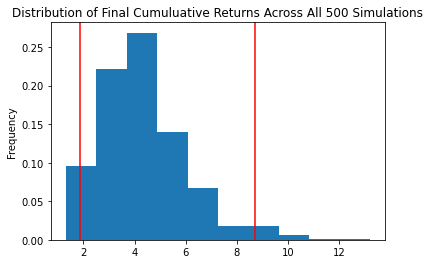

In [43]:
mc_large_cap_even.plot_distribution()

In [44]:
mc_large_cap_even_summary = mc_large_cap_even.summarize_cumulative_return()
mc_large_cap_even_summary

C:\Users\ryanr\Desktop\FinTech-Workspace\Challenges\Group3_Project1\Project1\App\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              4.329439
std               1.685315
min               1.309219
25%               3.177717
50%               4.041468
75%               5.207660
max              13.222047
95% CI Lower      1.874534
95% CI Upper      8.713473
Name: 1260, dtype: float64

In [45]:
mc_large_cap_even_lower_95 = mc_large_cap_even_summary[8]
mc_large_cap_even_upper_95 = mc_large_cap_even_summary[9]
mc_large_cap_even_mean = mc_large_cap_even_summary[1]
display(round(mc_large_cap_even_lower_95,2),
        round(mc_large_cap_even_mean,2),
        round(mc_large_cap_even_upper_95,2))

1.87

4.33

8.71

In [50]:
print(f"Meme stock portfolio average return is: {round(100*mc_meme_even_mean,1)}%")
print(f"Large Cap portfolio average return is: {round(100*mc_large_cap_even_mean,1)}%")
print(f"S&P 500 and Bond market average return is: {round(100*mc_market_even_mean,1)}%")

Meme stock portfolio average return is: 572.5%
Large Cap portfolio average return is: 432.9%
S&P 500 and Bond market average return is: 144.1%


In [53]:
print("There is a 95% chance the return will be between:")
print(f"Meme stock portfolio lower return is: {round(100*mc_meme_even_lower_95,1)}% - {round(100*mc_meme_even_upper_95,1)}%")
print(f"Large Cap portfolio lower return is: {round(100*mc_large_cap_even_lower_95,1)}% - {round(100*mc_large_cap_even_upper_95,1)}%")
print(f"S&P 500 and Bond market lower return is: {round(100*mc_market_even_lower_95,1)}% - {round(100*mc_market_even_upper_95,1)}%")

There is a 95% chance the return will be between:
Meme stock portfolio lower return is: 100.8% - 1602.0%
Large Cap portfolio lower return is: 187.5% - 871.3%
S&P 500 and Bond market lower return is: 85.7% - 216.3%


### Diversify the Portfolio

Based on our analysis so far, we have the answer to the question, "Are the meme stocks worth investing in?"